# 概率试验

之前大家学习了概率的基本知识。这里我们看一看如何简单地用Python做一些模拟实验来近似地计算概率论的数值。

参考资料：
- https://www.zhihu.com/question/62250384

目录：
- $\pi$ 的计算
- 三门问题
- 送钱问题

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np 

## $\pi$ 的计算

In [153]:
# 定义一些画图功能
def draw_circle():
    angles = np.linspace(0, 2*np.pi, 1000)
    xs = np.cos(angles)
    ys = np.sin(angles)
    plt.plot(xs, ys, 'r')
    plt.axes().set_aspect('equal', 'datalim')
#     plt.grid()

def draw_square():
    size = 1
    n_points = 1000
    ones = np.ones((n_points,))
    v = np.linspace(-size, size, n_points)
    color = 'b'
    plt.plot(ones, v, color)
    plt.plot(v, ones, color)
    plt.plot(-ones, v, color)
    plt.plot(v, -ones, color)
    
def draw_background():
    draw_square()
    draw_circle()

想象平面上有一个边长为$2$的正方形，里面内切一个半径为$1$的圆（见下图）。我们均匀随机地在正方形里撒一些点，那么每个点落在圆内的概率就是圆和正方形面积之比：
$$p = \frac{圆面积}{正方形面积} = \frac{\pi}{4}$$

如果撒很多点，那么落在圆内的点和总点数之比就可以近似这个概率：
$$p \approx \hat{p} = \frac{落在圆内点数}{总点数}$$

所以我们就有了一种近似计算圆周率$\pi$的方法：
$$\pi \approx 4\times \frac{落在圆内点数}{总点数} $$

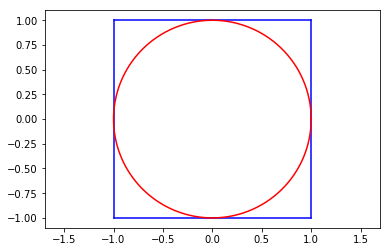

In [154]:
draw_background()

In [159]:
4+14

18

近似的pi是 3.13628


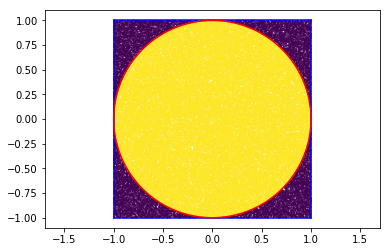

In [166]:
# 实验次数
N_TRAILS = 10**5

# 在正方形里扔很多点
points = np.random.uniform(low=-1, high=1, size=(N_TRAILS, 2))
# 到原点距离小于1的点在圆内部
sq_radiuses = np.sum(points**2, axis=1)
in_circle = (sq_radiuses < 1)
approx_pi = 4 * np.sum(in_circle) / N_TRAILS

draw_background()
plt.scatter(points[:, 0], points[:, 1], c=in_circle, s=0.1)

print('近似的pi是', approx_pi)

用一万个点精确度比较低，通常只能到小数点后一位。

## 三门问题

三门问题是一个有名的反直觉的概率问题：假如你正在参加一个节目，主持人给你看三扇门，其中只有一道门后面有一辆豪华跑车。你只要猜对是哪扇门，车就是你的了。但是这个游戏还有一个规则。你选完一扇门以后，主持人会在另外两扇门里选一扇没有车的打开来给你看，并且问你：现在你有机会从现在选的这扇门换到另一扇还没有开的的门，你换不换？

有的同学思路肯定是这样的：现在就相当于从两扇门里选有跑车的，所以两扇门的概率都是$\frac{1}{2}$，因此换不换对胜率都没有区别。

果真是这样的吗？我们用程序来模拟一下。

In [ ]:
# 模拟计算不换门的胜率

# 游戏数量
N_TRAILS = 10**3

# 生成跑车所在门的位置，在{0, 1, 2}中均匀随机选取
car_locations = np.random.randint(0, high=3, size=(N_TRAILS, ))
# 生成玩家最初所选位置，和上面一样也是均匀随机
player_locations = np.random.randint(0, high=3, size=(N_TRAILS, ))
# 判断每一次游戏玩家是否赢得跑车：因为不换门，后面开门的步骤对结果没有影响，胜利当且仅当选择的门和车所在的门相同
wins = (car_locations == player_locations)
win_pb = np.sum(wins) / N_TRAILS

print('不换门的胜率是', win_pb)

竟然不是$0.5$！通过写程序的过程，我们已经发现，如果不换门，那么这个游戏就变成如同主持人略过开门的环节一样，所以胜率就是$\frac{1}{3}$。

用类似的分析，我们知道用换门的玩法，只要车不在最初选的门内（概率$\frac{2}{3}$），最后就会胜利。模拟的程序只需要把胜利的条件改一下：

In [145]:
# 模拟计算换门的胜率

# 游戏数量
N_TRAILS = 10**6

# 生成跑车所在门的位置，在{0, 1, 2}中均匀随机选取
car_locations = np.random.randint(0, high=3, size=(N_TRAILS, ))
# 生成玩家最初所选位置，和上面一样也是均匀随机
player_locations = np.random.randint(0, high=3, size=(N_TRAILS, ))
# 判断每一次游戏玩家是否赢得跑车：因为换门，胜利当且仅当选择的门和车所在的门不同
wins = (car_locations != player_locations)
win_pb = np.sum(wins) / N_TRAILS

print('换门的胜率是', win_pb)

换门的胜率是 0.666336


## 送钱问题

有这样一个游戏：一个房间里有$100$个人，最开始每个人有$100$块钱。在每一回合，每个人拿出自己的$1$块钱（均匀）随机地给另一个人。如果一个人在这一回合没有钱，那么就不用给别人钱，而且仍然可以收到别人的钱。问经过很多回合以后（比如$10000$回合），每个人的钱数是怎样的分布？

直觉上看，这个游戏对每个人都是公平的，所以钱数应该差不多吧？来试验一下：

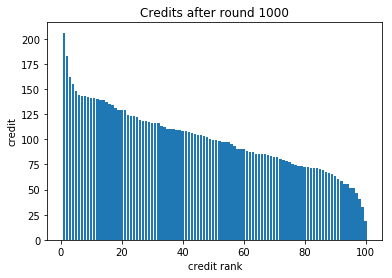

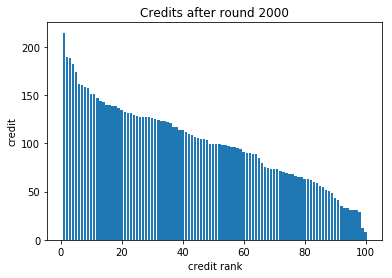

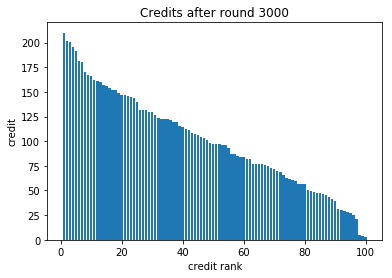

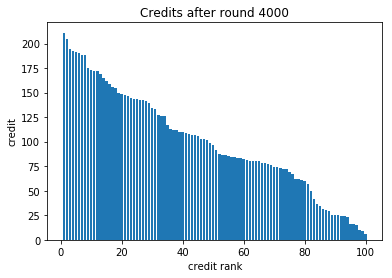

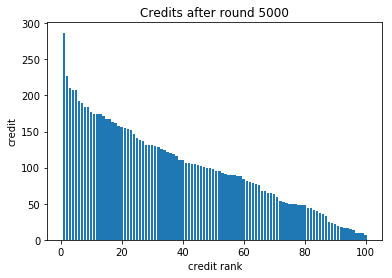

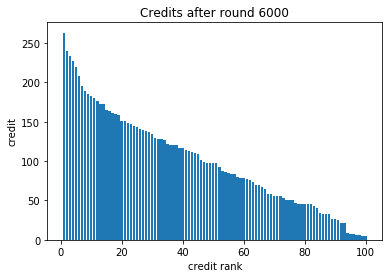

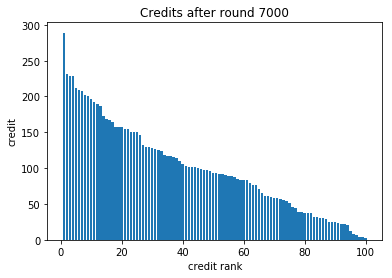

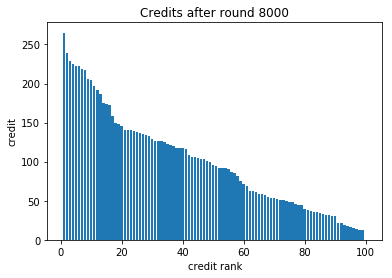

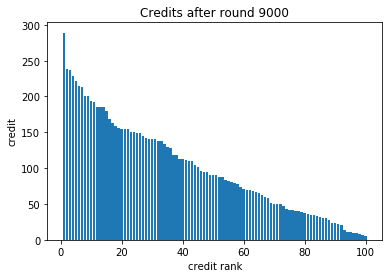

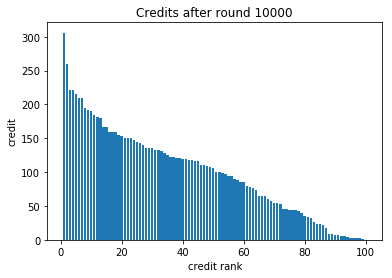

In [146]:
INIT_CREDIT = 100
N_PERSONS = 100
N_ROUNDS = 10**4

# TODO: set random seed

# 每人钱数
credits = np.ones((N_PERSONS, )) * INIT_CREDIT

def generate_destinations(n_persons):
    # 随机生成送钱目标，不能送自己
    destinations = np.random.randint(0, high=n_persons-1, size=(n_persons))
    self = np.arange(n_persons, dtype=np.int64)
    equal_mask = (destinations == self)
    destinations = destinations * np.logical_not(equal_mask) + (n_persons - 1) * equal_mask
    return destinations

def one_round(credits):
    n_persons = len(credits)
    destinations = generate_destinations(n_persons)
    # 没钱的人
    zero_mask = (credits == 0)
    # 没钱的人不送钱
    credits_change = (zero_mask - 1) + np.bincount(destinations[np.logical_not(zero_mask)], minlength=n_persons)
    return credits + credits_change

def plot_credits(credits, round_ind):
    sorted_credits = sorted(credits, reverse=True)
    plt.figure()
#     plt.plot(sorted_credits)
    plt.bar(range(1, len(credits) + 1), sorted_credits,)
    plt.xlabel('credit rank')
    plt.ylabel('credit')
    plt.title('Credits after round {}'.format(round_ind))

for i in range(N_ROUNDS):
    credits = one_round(credits)
    if (i + 1) % 1000 == 0:
        plot_credits(credits, i + 1)


我们发现钱的分布越来越不平均，而且趋近于一个指数函数的形状。这个问题的理论分析比较困难，我们留到后面复杂系统的章节进行具体分析。这里我们简单地用实验来回答一些问题。

In [147]:
# 10000轮之间，财富中位数如何变化?
N_TRAILS = 100

medians = np.zeros((N_TRAILS, N_ROUNDS))
for i in range(N_TRAILS):
    credits = np.ones((N_PERSONS, )) * INIT_CREDIT
    for j in range(N_ROUNDS):
        credits = one_round(credits)
        medians[i, j] = np.median(credits)

10000轮之后的中位数是94.112939 (标准差 6.749892242271649)


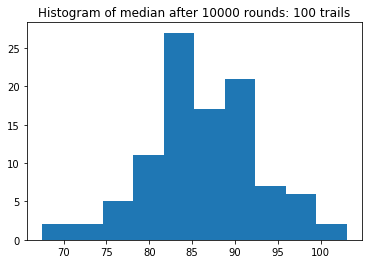

In [148]:
plt.hist(medians[:, N_ROUNDS - 1])
plt.title('Histogram of median after 10000 rounds: 100 trails')
print('10000轮之后的中位数是{} (标准差 {})'.format(np.mean(medians), np.std(medians)))

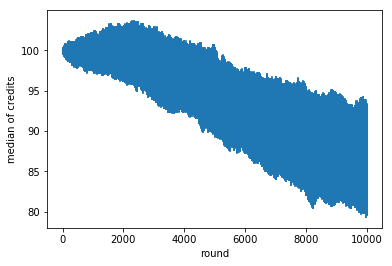

In [149]:
round_medians_mean = np.mean(medians, axis=0)
round_medians_std = np.std(medians, axis=0)
plt.errorbar(range(1, N_ROUNDS + 1), round_medians_mean, round_medians_std)
plt.xlabel('round')
plt.ylabel('median of credits')

中位数随着轮数的增加而减少，说明财富越来越不平均。

In [150]:
# 某一个人的钱数和排名会如何随时间变化?
N_TRAILS = 10 # 100

# 观察对象编号
SUBJECT = 99

money = np.zeros((N_TRAILS, N_ROUNDS), dtype=np.int64)
ranks = np.zeros((N_TRAILS, N_ROUNDS), dtype=np.int64)
for i in range(N_TRAILS):
    credits = np.ones((N_PERSONS, )) * INIT_CREDIT
    for j in range(N_ROUNDS):
        credits = one_round(credits)
        subject_credit = credits[SUBJECT]
        money[i, j] = subject_credit
        ranks[i, j] = sorted(credits, reverse=True).index(subject_credit)

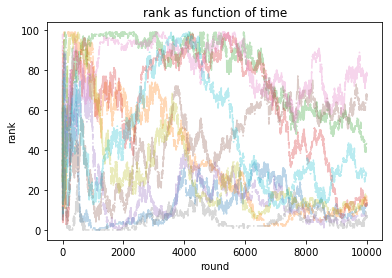

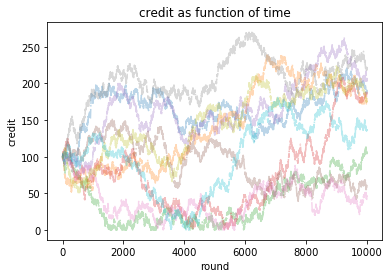

In [151]:
plt.figure()
for i in range(10):
    plt.plot(range(1, N_ROUNDS + 1), ranks[i, :], '-.', alpha=0.3)
plt.title('rank as function of time')
plt.ylabel('rank')
plt.xlabel('round')

plt.figure()
for i in range(10):
    plt.plot(range(1, N_ROUNDS + 1), money[i, :], '-.', alpha=0.3)
plt.title('credit as function of time')
plt.ylabel('credit')
plt.xlabel('round')